In [2]:
import pandas as pd
import importnb
import import_ipynb
#from tkinter import *

from database_interaction import Nba_DB
from player_clustering import Clustering_Algorithm


In [3]:
#Class that handles the front end interaction with user's inputs
class UserExperience:
    db_conn = None
    season = ''
    columns = ''
    queried_data = pd.DataFrame()
    
    #Constructor
    def __init__(self):
        self.db_conn = Nba_DB()
        
    #Start the program    
    def startup(self):
        #Create a list of available seasons to select from
        print('Welcome to the interactive NBA Player clustering program. Please select which NBA season you would like to look at from the following list.')
        
        #Get season and columns input
        self.season = self.get_season()
        self.columns = self.get_columns()
        
        #Get dataset
        self.get_data()
        
        #Close out connection
        self.db_conn.close_connection()
        
        #Run the clustering algorithm
        cluster = Clustering_Algorithm(self.queried_data, 25)
        cluster.start_data_prep()
        self.queried_data = cluster.get_queried_data()
        
    #Return the season that the user would like to include as features
    def get_season(self):
        seasons = self.db_conn.execute_query("SELECT DISTINCT season FROM players ORDER BY season")
        print(list(seasons['season']))
        season_input = input("Season Selected: ")
        
        #Check that the user input is a valid season
        if season_input not in seasons['season'].unique():
            print('Not an actual season, try again')
            return self.get_season()
        else:
            return season_input
    
    #Return the columns that the user would like to include as features    
    def get_columns(self):
        available_columns = self.db_conn.execute_query("SELECT * FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'players'")
        print(list(available_columns['column_name']))
        
        columns = input('Select columns that you want to use in clustering algorithm. (Please use the following format: x, y, z)')
        
        #Add validator to check if column names are valid
        
        return columns
    
    #Run a query with the season and columns objects to return the dataset to be sent to the clustering algorithm
    def get_data(self):
        query = "SELECT " + self.columns + " FROM players where SEASON = '" + self.season + "'"
        print(query)
        self.queried_data = self.db_conn.execute_query(query)
        
        #Display sample of queried data
        display(self.queried_data.head())
        

 
        
        #self.drop_down_menu(seasons)
    
#     #Create a drop down menu of passed in options
#     def drop_down_menu(self, options):
#         #Create an instance of tkinter frame
#         win= Tk()

#         #Define the size of window or frame
#         win.geometry("715x250")

#         #Set the Menu initially
#         menu= StringVar()
#         menu.set("Select Any Season")

#         #Create a dropdown Menu
#         drop= OptionMenu(win, menu, *options)
#         drop.pack()
#         #print(menu.get())
#         win.mainloop()
    

successfully connected
Welcome to the interactive NBA Player clustering program. Please select which NBA season you would like to look at from the following list.
['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']


Season Selected:  2018-19


['fg3m', 'player_id', 'corner_3_fgm', 'corner_3_fga', 'corner_3_fg_pct', 'salary', 'team_id', 'age', 'gp', 'w', 'l', 'w_pct', 'min', 'e_off_rating', 'off_rating', 'sp_work_off_rating', 'e_def_rating', 'def_rating', 'sp_work_def_rating', 'e_net_rating', 'net_rating', 'sp_work_net_rating', 'ast_pct', 'ast_to', 'ast_ratio', 'oreb_pct', 'dreb_pct', 'reb_pct', 'tm_tov_pct', 'e_tov_pct', 'efg_pct', 'ts_pct', 'usg_pct', 'e_usg_pct', 'e_pace', 'pace', 'pace_per40', 'sp_work_pace', 'pie', 'poss', 'fgm', 'fga', 'fgm_pg', 'fga_pg', 'fg_pct', 'gp_rank', 'w_rank', 'l_rank', 'w_pct_rank', 'min_rank', 'e_off_rating_rank', 'off_rating_rank', 'sp_work_off_rating_rank', 'e_def_rating_rank', 'def_rating_rank', 'sp_work_def_rating_rank', 'e_net_rating_rank', 'net_rating_rank', 'sp_work_net_rating_rank', 'ast_pct_rank', 'ast_to_rank', 'ast_ratio_rank', 'oreb_pct_rank', 'dreb_pct_rank', 'reb_pct_rank', 'tm_tov_pct_rank', 'e_tov_pct_rank', 'efg_pct_rank', 'ts_pct_rank', 'usg_pct_rank', 'e_usg_pct_rank', 'e_p

Select columns that you want to use in clustering algorithm. (Please use the following format: x, y, z) player_name, e_def_rating, pie, e_off_rating, ast_to, e_pace, e_usg_pct, position, ts_pct, fg2a, fg2_pct, fg3a, fg3_pct, in_the_paint_non_ra_fga ,in_the_paint_non_ra_fg_pct, corner_3_fga, corner_3_fg_pct, fg3a_frequency, fg2a_frequency, gp


SELECT player_name, e_def_rating, pie, e_off_rating, ast_to, e_pace, e_usg_pct, position, ts_pct, fg2a, fg2_pct, fg3a, fg3_pct, in_the_paint_non_ra_fga ,in_the_paint_non_ra_fg_pct, corner_3_fga, corner_3_fg_pct, fg3a_frequency, fg2a_frequency, gp FROM players where SEASON = '2018-19'


,player_name,e_def_rating,pie,e_off_rating,ast_to,e_pace,e_usg_pct,position,ts_pct,fg2a,fg2_pct,fg3a,fg3_pct,in_the_paint_non_ra_fga,in_the_paint_non_ra_fg_pct,corner_3_fga,corner_3_fg_pct,fg3a_frequency,fg2a_frequency,gp
0,aaron gordon,105.2,0.109,107.0,1.78,99.77,0.219,PF,0.538,682.0,0.500,339.0,0.348,140.0,0.343,92.0,0.391,0.332,0.668,78
1,aaron holiday,100.9,0.078,107.5,2.17,102.83,0.214,PG,0.518,135.0,0.459,127.0,0.339,36.0,0.361,16.0,0.313,0.485,0.515,50
2,abdel nader,107.6,0.066,97.7,0.77,103.41,0.157,SF,0.522,114.0,0.518,99.0,0.313,30.0,0.467,40.0,0.375,0.465,0.535,61
3,al horford,105.5,0.134,112.6,2.77,101.25,0.193,PF,0.605,520.0,0.604,203.0,0.360,143.0,0.510,21.0,0.286,0.281,0.719,68
4,al-farouq aminu,107.1,0.097,114.8,1.44,102.37,0.136,PF,0.568,310.0,0.513,278.0,0.345,57.0,0.351,94.0,0.340,0.473,0.527,81


connection closed


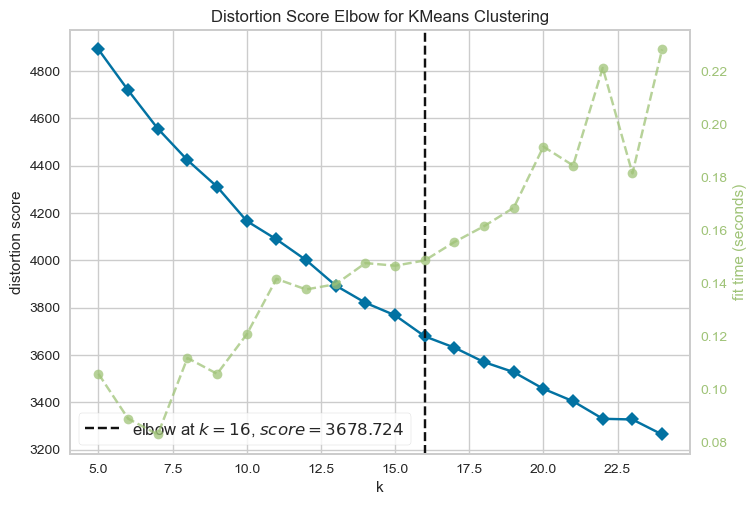

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
5.0,0.142797,80.016041,1.910530
6.0,0.132703,69.622332,1.915611
7.0,0.120242,62.644153,1.991535
8.0,0.116919,57.671511,2.049188
9.0,0.121487,53.317050,1.964684
10.0,0.109539,50.257668,2.000006
11.0,0.099443,47.105681,2.039397
12.0,0.103920,44.227109,1.961854
13.0,0.097849,42.042639,2.065448


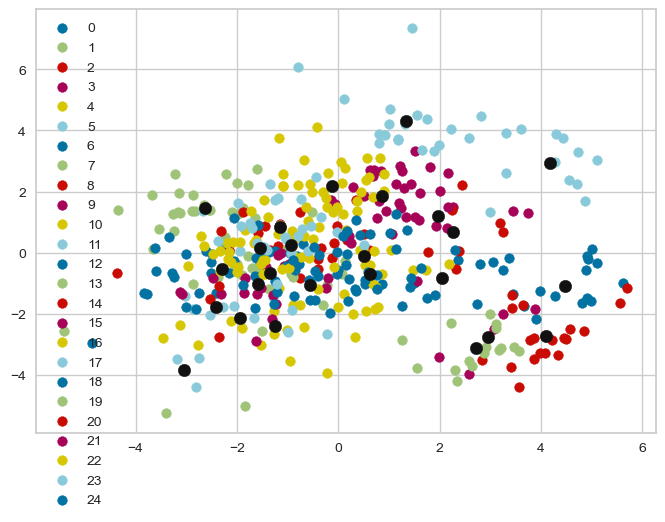

player_clustering.ipynb:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "    #Run sillhouete average scoring to find optimal number of clusters\n",


In [4]:
#quick input: player_name, e_def_rating, pie, e_off_rating, ast_to, e_pace, e_usg_pct, position, ts_pct, fg2a, fg2_pct, fg3a, fg3_pct, in_the_paint_non_ra_fga ,in_the_paint_non_ra_fg_pct, corner_3_fga, corner_3_fg_pct, fg3a_frequency, fg2a_frequency, gp
user_ex = UserExperience()
user_ex.startup()

In [5]:
user_ex.queried_data.loc[user_ex.queried_data['cluster'] == 12, ['player_name', 'position', 'cluster', 'fg3_pct', 'fg3a_frequency', 'fg2_pct', 'fg2a_frequency']]

,player_name,position,cluster,fg3_pct,fg3a_frequency,fg2_pct,fg2a_frequency
7,alex abrines,G,12,0.323,0.809,0.500,0.191
27,anthony tolliver,PF,12,0.377,0.830,0.409,0.170
34,ben mclemore,SF,12,0.415,0.641,0.348,0.359
57,cj miles,unknown,12,0.330,0.657,0.425,0.343
83,d.j. wilson,PF,12,0.362,0.510,0.467,0.490
98,darius miller,SF,12,0.365,0.752,0.467,0.248
161,ersan ilyasova,PF,12,0.363,0.419,0.491,0.581
164,frank jackson,PG,12,0.312,0.379,0.507,0.621
193,ian clark,G,12,0.327,0.527,0.470,0.473
196,iman shumpert,unknown,12,0.348,0.612,0.416,0.388
